In [29]:
#librerias a usar
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#cargar archivo csv
data = pd.read_csv('Mexico_50_Columnas.csv')
# Eliminar la columna 'Unnamed: 0.1'
if 'Unnamed: 0.1' in data.columns:
    data = data.drop(columns=['Unnamed: 0.1'])
data.isnull().sum()
data.to_csv('Mexico_50_Columnas.csv', index=False)

In [31]:
#Verifico los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    26582 non-null  int64  
 1   id                                            26582 non-null  int64  
 2   listing_url                                   26582 non-null  object 
 3   last_scraped                                  26582 non-null  object 
 4   description                                   26582 non-null  object 
 5   host_id                                       26582 non-null  int64  
 6   host_url                                      26582 non-null  object 
 7   host_since                                    26582 non-null  object 
 8   host_response_time                            26582 non-null  object 
 9   host_response_rate                            26582 non-null 

In [32]:
#Eliminamos la columnna Unnamed: 0 , que es un identificador de 1 a la n
data = data.drop(['Unnamed: 0'], axis=1)
data.isnull().sum()

id                                                 0
listing_url                                        0
last_scraped                                       0
description                                        0
host_id                                            0
host_url                                           0
host_since                                         0
host_response_time                                 0
host_response_rate                                 0
host_acceptance_rate                               0
host_is_superhost                                  0
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_identity_verified                             0
neighbourhood                                      0
neighbourhood_cleansed                             0
property_type                                      0
room_type                                     

In [33]:
# Eliminar el símbolo '$' y las comas, convertir a float y luego a int
data['price'] = (
    data['price']
    .replace('[$,]', '', regex=True)  # Quita '$' y ','
    .astype(float)                     # Convierte a float para manejar decimales
    .fillna(0)                          # Reemplaza NaN por 0 (o cualquier otro valor)
    .astype(int)                        # Convierte a int
)

# Verificar el tipo de datos de la columna 'price'
print(data['price'].dtypes)


int64


In [34]:
#creo 2 dataframes para poder poder procesar los outliers, cualitatitvos y cuantitativoss
cuantitativas = data.select_dtypes(include=['float64', 'int64'])
cualitativas = data.select_dtypes(include=['object'])

In [35]:
cuantitativas.info()
cualitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   host_id                                       26582 non-null  int64  
 2   host_listings_count                           26582 non-null  int64  
 3   host_total_listings_count                     26582 non-null  int64  
 4   accommodates                                  26582 non-null  int64  
 5   bathrooms                                     26582 non-null  float64
 6   bedrooms                                      26582 non-null  float64
 7   beds                                          26582 non-null  float64
 8   price                                         26582 non-null  int64  
 9   minimum_nights                                26582 non-null 

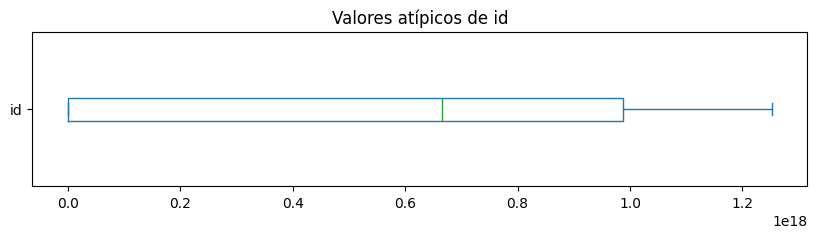

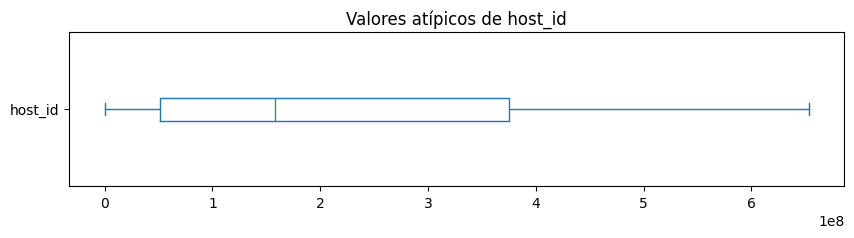

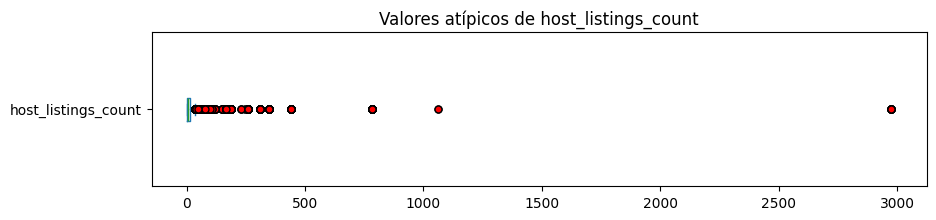

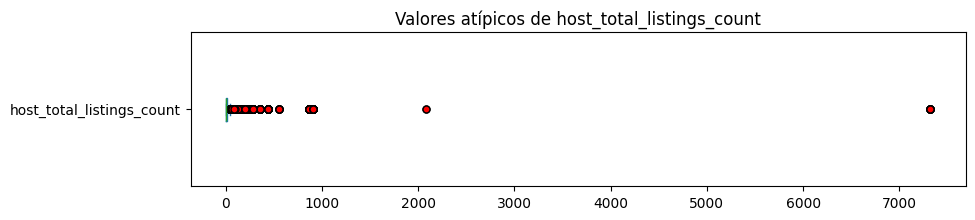

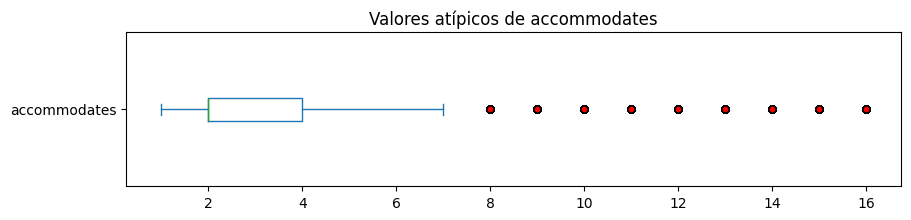

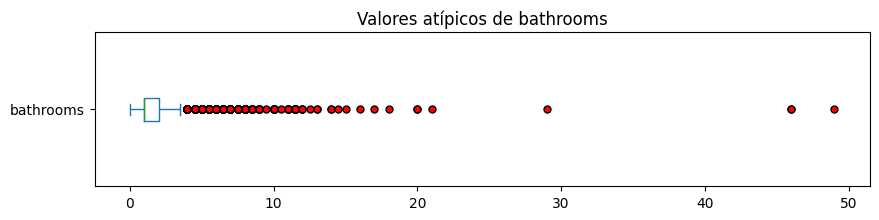

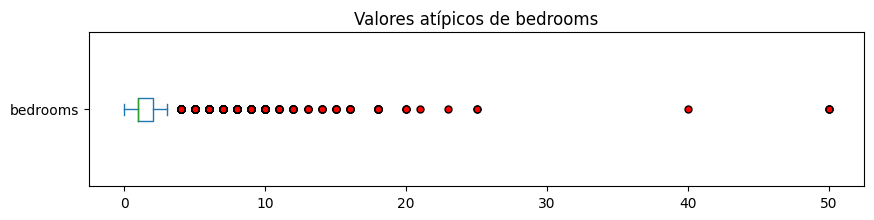

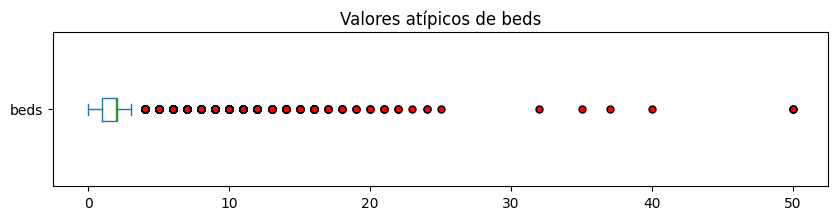

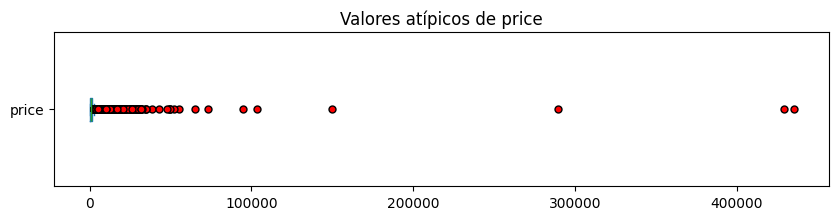

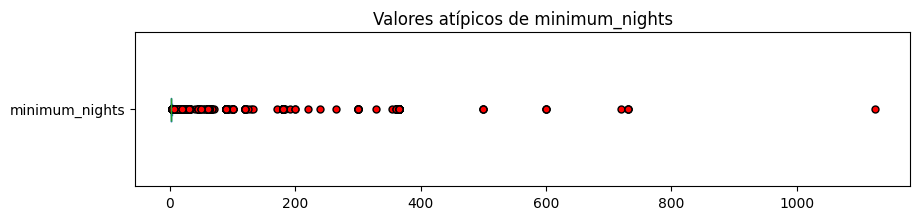

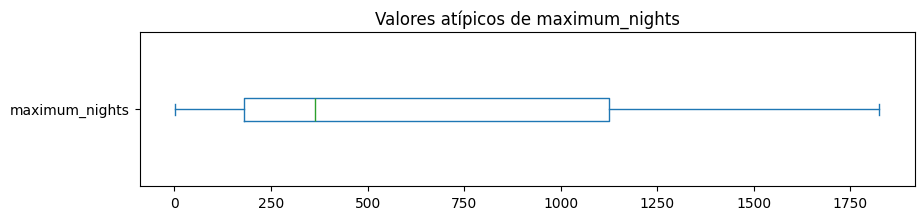

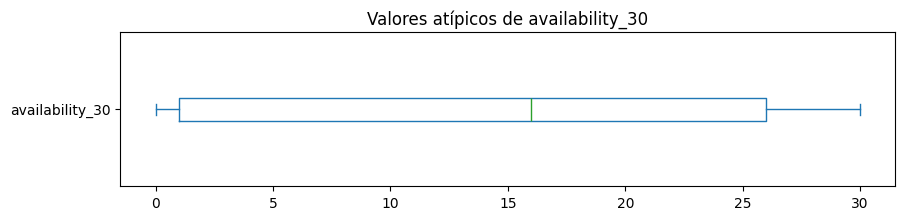

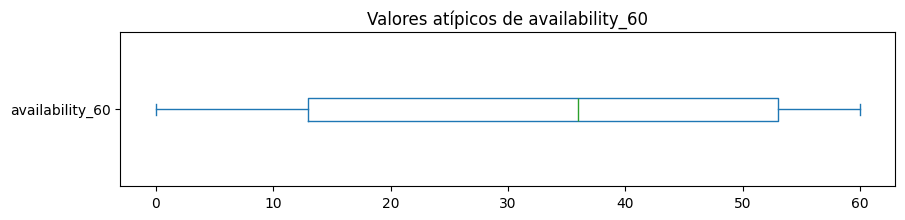

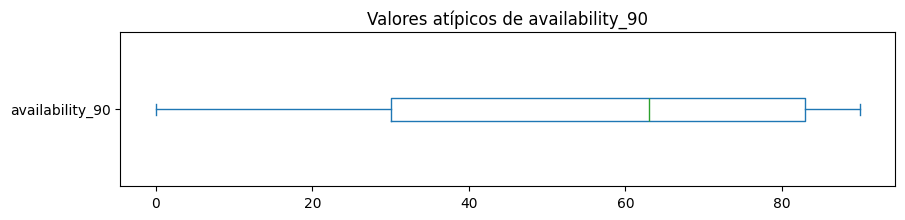

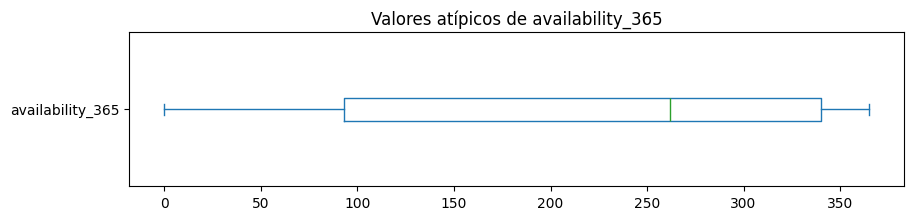

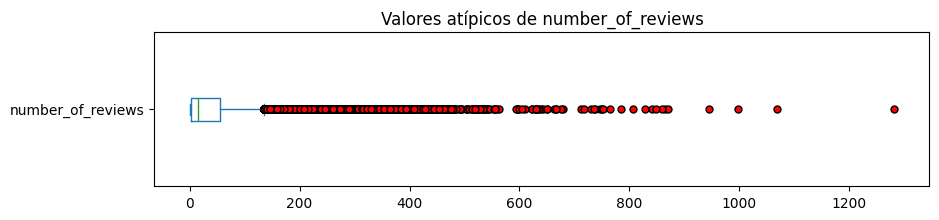

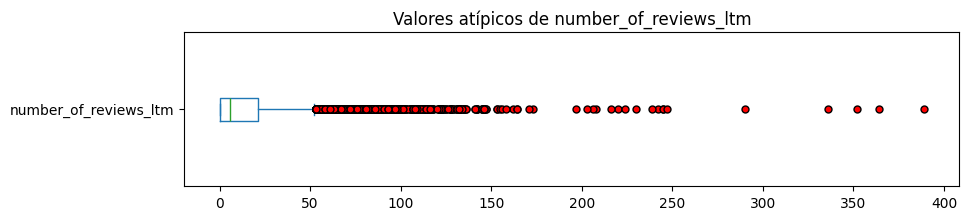

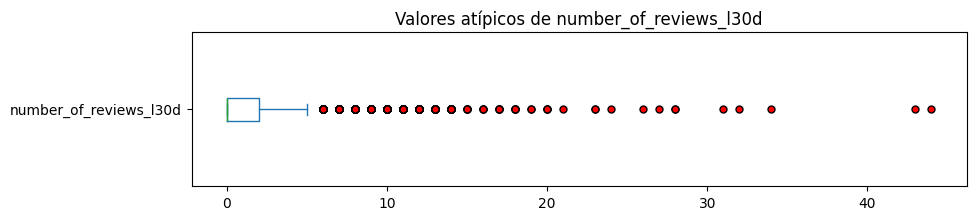

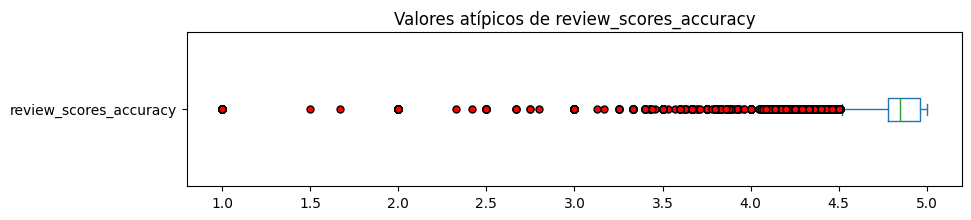

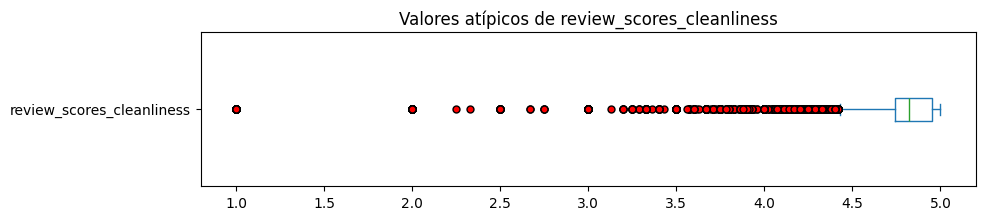

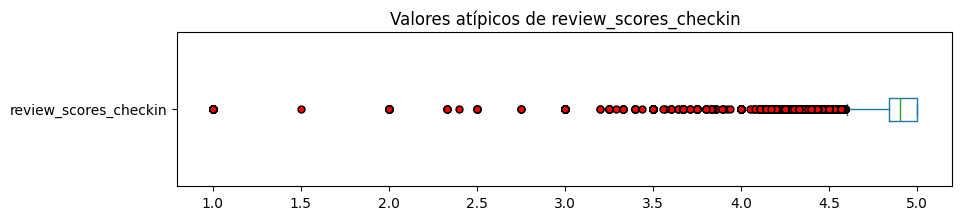

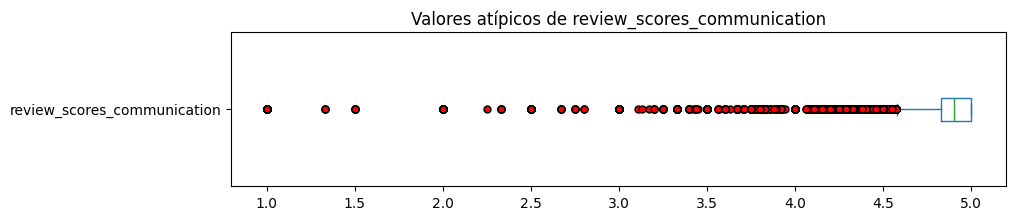

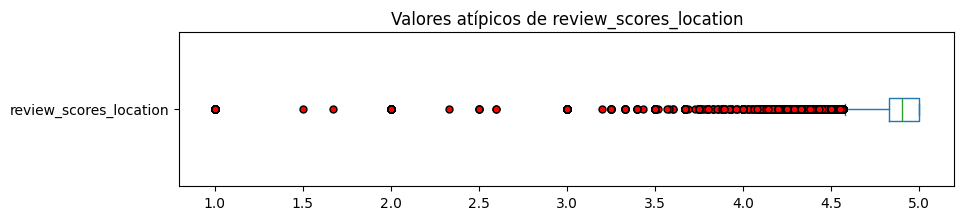

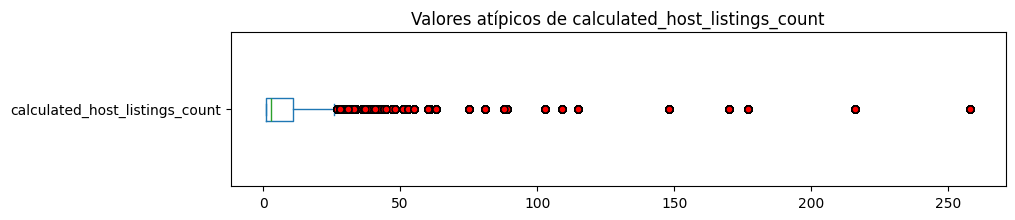

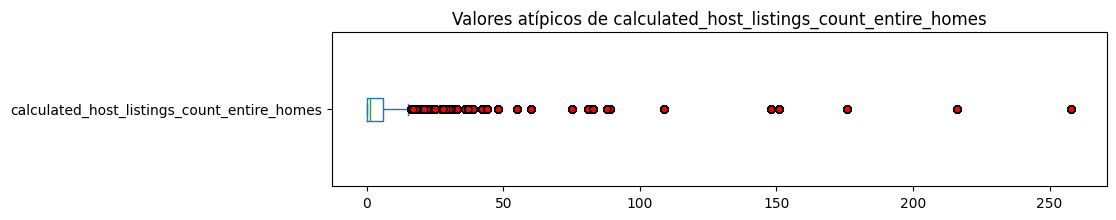

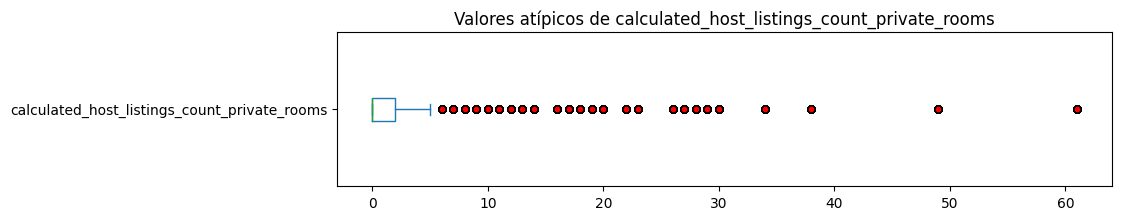

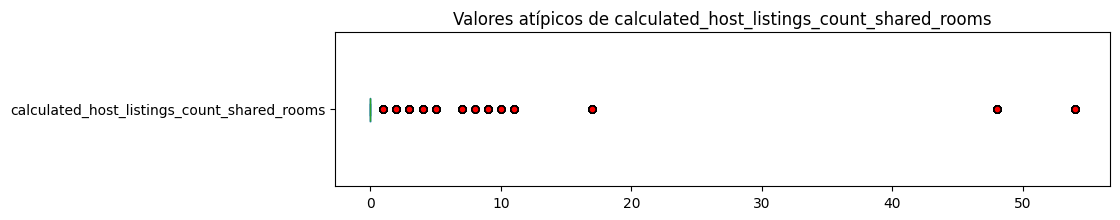

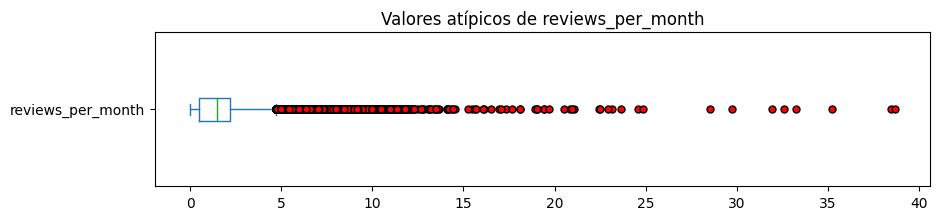

In [36]:
# Crear un diagrama de caja para cada columna en el DataFrame cuantitativas
for columna in cuantitativas.columns:
    plt.figure(figsize=(10, 2))
    cuantitativas[columna].plot(kind='box', vert=False, flierprops=dict(marker='o', markerfacecolor='red', markersize=5))
    plt.title(f"Valores atípicos de {columna}")
    plt.show()

**Procesamiento "Desviación estandar" para eliminar outliers en dataframe**

In [37]:
#Metodo aplicando desviaion estandar. Encuentro los valores extremos
y = cuantitativas
Limite_superior = y.mean() + 3*y.std()  
Limite_inferior = y.mean() - 3*y.std()  
print("Limite superior permitido: ", Limite_superior)
print("Limite inferior permitido: ", Limite_inferior)

Limite superior permitido:  id                                              1.997574e+18
host_id                                         7.675833e+08
host_listings_count                             3.295566e+02
host_total_listings_count                       6.148874e+02
accommodates                                    1.043010e+01
bathrooms                                       4.584733e+00
bedrooms                                        5.339414e+00
beds                                            6.981786e+00
price                                           1.573442e+04
minimum_nights                                  8.183006e+01
maximum_nights                                  1.793887e+03
availability_30                                 4.852387e+01
availability_60                                 9.733159e+01
availability_90                                 1.496068e+02
availability_365                                6.026093e+02
number_of_reviews                               2.711536e

In [38]:
#obtenemos datos y los outliers se convierten en nulos en el Dataframe
data3 = cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]
data3.isnull().sum()

id                                                0
host_id                                           0
host_listings_count                             304
host_total_listings_count                       380
accommodates                                    526
bathrooms                                       309
bedrooms                                        286
beds                                            466
price                                            94
minimum_nights                                  190
maximum_nights                                    1
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
number_of_reviews                               608
number_of_reviews_ltm                           432
number_of_reviews_l30d                          511
review_scores_accuracy                          402
review_score

In [39]:
data_clean = data3.copy()
data_clean = data_clean.fillna(round(data3.mean(), 2))
data_clean.isnull().sum()

id                                              0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_accuracy                          0
review_scores_cleanliness                       0


**Procedimiento "cuantiles" para sustituir outliers en dataframe**

In [40]:
#Metodo para aplicar cuartiles. Encuentro cuartiles de .25 y .75
y = cuantitativas

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q2
iqr = percentile75 - percentile25   

Limite_superior_iqr = percentile75 + 1.5*iqr
Limite_inferior_iqr = percentile75 - 1.5*iqr

print("Limite superior permitido: ", Limite_superior_iqr)
print("Limite inferior permitido: ", Limite_inferior_iqr)

Limite superior permitido:  id                                              2.467577e+18
host_id                                         8.612864e+08
host_listings_count                             3.350000e+01
host_total_listings_count                       3.950000e+01
accommodates                                    7.000000e+00
bathrooms                                       3.500000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
price                                           2.977500e+03
minimum_nights                                  3.500000e+00
maximum_nights                                  2.542500e+03
availability_30                                 6.350000e+01
availability_60                                 1.130000e+02
availability_90                                 1.625000e+02
availability_365                                7.105000e+02
number_of_reviews                               1.355000e

In [41]:
#obtenemos datos limpios del dataframe
data3_iqr = cuantitativas[(y <= Limite_superior_iqr) & (y >= Limite_inferior_iqr)]  
data3_iqr.isnull().sum()

id                                                 0
host_id                                            0
host_listings_count                             3567
host_total_listings_count                       3764
accommodates                                    1352
bathrooms                                        736
bedrooms                                        1321
beds                                            2919
price                                           1829
minimum_nights                                  3584
maximum_nights                                     0
availability_30                                    0
availability_60                                    0
availability_90                                 4469
availability_365                                   0
number_of_reviews                               2328
number_of_reviews_ltm                           1318
number_of_reviews_l30d                           813
review_scores_accuracy                        

In [42]:
#Reemplazar valores atipicos (nulos) del dataframe con "mean"
data4_iqr = data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(), 2))
data4_iqr.isnull().sum()

id                                              0
host_id                                         0
host_listings_count                             0
host_total_listings_count                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_accuracy                          0
review_scores_cleanliness                       0


In [43]:
#unimos el dataframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   26582 non-null  object 
 1   last_scraped                                  26582 non-null  object 
 2   description                                   26582 non-null  object 
 3   host_url                                      26582 non-null  object 
 4   host_since                                    26582 non-null  object 
 5   host_response_time                            26582 non-null  object 
 6   host_response_rate                            26582 non-null  object 
 7   host_acceptance_rate                          26582 non-null  object 
 8   host_is_superhost                             26582 non-null  object 
 9   host_verifications                            26582 non-null 

In [44]:
Datos_limpios.to_csv('Mexico_datos_limpios.csv')
df = pd.read_csv('Mexico_datos_limpios.csv')
df.isnull().sum()

Unnamed: 0                                       0
listing_url                                      0
last_scraped                                     0
description                                      0
host_url                                         0
host_since                                       0
host_response_time                               0
host_response_rate                               0
host_acceptance_rate                             0
host_is_superhost                                0
host_verifications                               0
host_identity_verified                           0
neighbourhood                                    0
neighbourhood_cleansed                           0
property_type                                    0
room_type                                        0
amenities                                        0
has_availability                                 0
calendar_last_scraped                            0
first_review                   